### **Due Date: Friday, April 16, 5PM PDT, on Gradescope.**


# Submission instructions

1. Copy this notebook into your own Google drive with its original name (for example, you can copy this notebook to a folder named `ECE180` that you create in your Google Drive).
2. Work on your own copy and after you are done, make sure all your code has executed and output of the code (if any) is visible below each code block for full credit. You are given skeleton code for Problem 1 and 2 below.
3. To submit to gradescope, download this notebook as a pdf (using `nbconvert` - instructions mentioned below and summarized in point 4, 5 here) after executing all code blocks and rename the pdf to ECE180-S21-HW2-FirstName-LastName-PermNumber.pdf and then submit. **Note**: **When submitting your pdf to gradescope, please indicate the pages where your answers are located.**
4. Note: the default location for Google drive after you mount it (see below for how to mounting) `/content/drive/MyDrive`.
5. Say that the location of this notebook on your google drive is in a folder `ECE180`. Then, the full path for the notebook in Google Colab with its original name would be: `/content/drive/MyDrive/ECE180/ECE180-S21-HW2.ipynb`. Towards the end of this notebook, you will see the command to convert this notebook to pdf, which would be saved as /content/drive/MyDrive/ECE180/ECE180-S21-HW2.pdf. This is the pdf you will rename (point 3) and submit.

# Preliminary steps:
1.   Run code below to mount the Google drive (in some cases, you may need to enter the authorization code for this after following the link that might show). Note: you can view the contents of Google Drive in Google Colab in the left panel after mounting it (you might need to refresh the folders to see). The location for Google Drive after you mount it is `/content/drive/MyDrive`.

In [45]:
## might need to enter authorization code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



2.   Next, let us install the dependencies you will need to convert this notebook to pdf (point 3 of submission instructions) using `nbconvert` utility for submission to Gradescope. To install `nbconvert`, run the following commands - make sure they complete without any errors - seek help on the Gauchospace forums or from TAs if you encounter errors. 
Watch out for a prompt to press ENTER - you have to respond by clicking below the prompt to reveal a text box and then press enter.
NOTE: in order to reduce the size of this notebook, the output of the following code cell can be deleted (by clicking the 'x' icon that shows up in the top left of the cell output, before saving this notebook as a pdf).

In [ ]:
!git clone https://github.com/jupyter/nbconvert.git
%cd nbconvert
!pip install -e .;
%cd /content/
!apt-get -q install pandoc
!apt-get -qq update
!apt-get -qq install inkscape
!add-apt-repository universe
!add-apt-repository ppa:inkscape.dev/stable
!apt-get -qq update
!apt -qq install inkscape
!apt-get -qq install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

3. Restart runtime to load newly-installed libraries (Runtine --> Restart runtime)

# Simple Linear vs. Deming Regression

In this programming exercise, we will explore the differences between simple vs. Deming regression.

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression): Accounts for errors in the observations only in the y axis. That is, the residual error is computed using just the y coordinate of given data and the output of the fitted line for the corresponding input x.

[Deming Regression](https://en.wikipedia.org/wiki/Deming_regression): Accounts for errors in the observation on both x and y axis. That is, the residual error is computed using the *perpendicular* distance of the fitted line from the given data points.

For example, see the image is [this link](https://bisque.ece.ucsb.edu/client_service/view?resource=https://bisque.ece.ucsb.edu/data_service/00-zK5MpAScZUqCvjMWk9ijRE). 

For Simple linear regression, the vertical distance of data points (shown in black) from the line is minimized - this distance is shown in blue in the image in link above. The blue line indicates the **vertical residual error**.

For Deming regression, the perpendicular distance of data points (shown in black) from the line is minimized - this distance is shown in red in the image in link above. The red line indicates the **perpendicular residual error**.

For this assignment, you will perform Simple as well as Deming regression to given data and report the performance metrics (vertical and perpendicular residual error) as well as visual results.




First, generate the data for linear regression. We will use this synthetic dataset this assignment. Do not change the seed used to generate the data.

**NOTE**: the experiments for both Simple and Deming regression would be repeated for various number of available data points: 5, 10, 20.

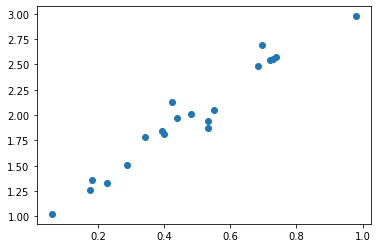

In [5]:
import numpy as np
import matplotlib.pyplot as plt

maximum_N = 20
sigma = 0.1
np.random.seed(123)

def f(x): return 0.2*np.sin(20*x) +2*x + 1

x_data = np.random.rand(maximum_N)
y_data = f(x_data)  + np.random.normal(0,sigma,maximum_N)

plt.scatter(x_data,y_data)

# Problem 1: perform simple linear regression


Next, let's work on a simple linear regression case by using $residual\ error = \frac{1}{n} \sum_{data} (y_{data}-\hat{y})^2$.

1. Given below is some skeleton code.
2. Fill in the SimpleLeastSquares class.
3. Fill in the next cell to fit the `model1_5points` for a given number of data points N (start with N = 5).
4. Predict the output for test input `x_test`.
5. The plotting code is already mentioned - be sure to run it to see the output line overlayed with the input data.
6. Print the formulation for the line that you estimated.
7. Calculate and print the average vertical *and* average perpendicular residual  error of your estimation for the input data points.
8. Repeat steps 3 through 7 for N = 10, 20

Hint: you may use `np.linalg.lstsq`.

In [6]:
## STUDENT TASK: code up SimpleLeastSquares
class SimpleLeastSquares:
  def __init__(self):
    self.b = None
    self.w = None

  def fit(self,x,y):
    A = np.vstack([x, np.ones(len(x))]).T
    self.w, self.b = np.linalg.lstsq(A, y)[0]
  

  def __call__(self,x):        
    return self.w * x + self.b

In [35]:
def fit_model_and_output_info(N):
  ## STUDENT TASK: fit SimpleLeastSquares model to 5 data points i.e., N = 5 (skeleton code given)

  ## initialize the model
  model = SimpleLeastSquares()

  ## select the given number of points
  x_data_selected = x_data[0:N]
  y_data_selected = y_data[0:N]

  ## fit the model for selected points
  model.fit(x_data_selected, y_data_selected)
  

  ## make the prediction for x_test as input
  x_test = np.linspace(0,1,1000)
  y_hat_model = model(x_test)

  ## plotting code
  plt.plot(x_data,y_data,'o')
  plt.plot(x_test,y_hat_model)

  ## STUDENT TASK: add code to print the formulation of the line
  print('y =', model.w, '* x +', model.b)
  ## STUDENT TASK: add code to compute residual errors (vertical and perpendicular) for input data (x_data, y_data)


  def get_avg_error(error_arr): return np.mean(error_arr ** 2)
  y_hat = model(x_data)
  vertical_resid_err = get_avg_error(y_hat - y_data)
  print(f'Vertical residual error: {vertical_resid_err}')

  normal = np.asarray([1, -1 / model.w])
  unit_normal = normal / np.linalg.norm(normal)
  
  points = np.vstack((x_data, y_data - model.b)).T
  perpendicular_resid_err = get_avg_error(points @ unit_normal)
  print(f'Perpendicular residual error: {perpendicular_resid_err}')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


y = 2.602235609206688 * x + 0.732157422560689
Vertical residual error: 0.020781654503767684
Perpendicular residual error: 0.002674040588698824


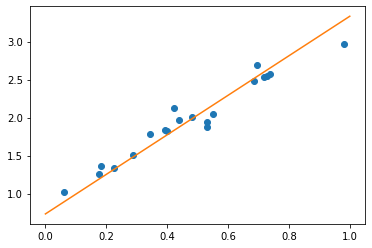

In [36]:
fit_model_and_output_info(5)

y = 2.200610832548745 * x + 0.9584129861322119
Vertical residual error: 0.013512995145785023
Perpendicular residual error: 0.002312804493712278


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


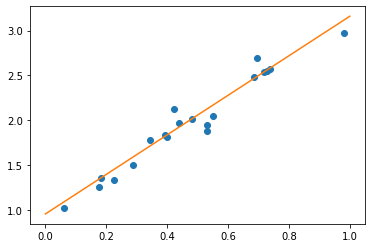

In [37]:
fit_model_and_output_info(10)

y = 2.2128760929937776 * x + 0.9273119638694097
Vertical residual error: 0.012868556746739163
Perpendicular residual error: 0.0021822873058603494


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


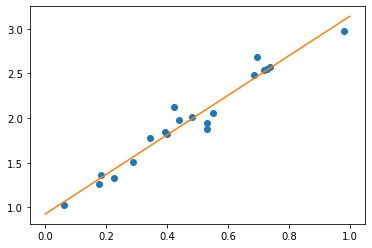

In [38]:
## STUDENT TASK : repeat the above experiment for N = 20

fit_model_and_output_info(20)
## STUDENT TASK: enter rest of code as done above and plot the line, print line formulation, print residual errors


# Problem 2: perform Deming regression


Next, let's work on a Deming linear regression case by using 

$residual\ error = \frac{1}{n} \sum_{data} \min_{x'} [(m x' + b - y_{data})^2 + (x' - x_{data})^2]$

This minimum, or shortest distnce from the point to the line, will make the residual perpendicular to the best fit line.


1. Given below is some skeleton code.
2. Fill in the DemingLeastSquares class.
3. Fill in the next cell to fit the `model2_5points` for a given number of data points N (start with N = 5).
4. Predict the output for test input `x_test`.
5. The plotting code is already mentioned - be sure to run it to see the output line overlayed with the input data.
6. Print the formulation for the line that you estimated.
7. Calculate and print the average vertical *and* average perpendicular residual  error of your estimation for the input data points.
8. Repeat steps 3 through 7 for N = 10, 20.

Hint: you may use `np.linalg.eig`.


In [39]:
## STUDENT TASK: code up DemingLeastSquares
class DemingLeastSquares:
  def __init__(self):
    self.b = None
    self.w = None

  def fit(self,x,y):
    x_avg = np.mean(x)
    y_avg = np.mean(y)
    centered_x = x - x_avg
    centered_y = y - y_avg

    X = np.vstack((centered_x, centered_y))    
    eigen_values, eigen_vectors = np.linalg.eig(X @ X.T)
    small_eig_index = eigen_values.argmin()
    vxx, vxy = eigen_vectors[:,small_eig_index] 

    self.w = -1 * (vxx / vxy)        
    self.b = y_avg - self.w * x_avg
    

  def __call__(self,x):        
    return self.w * x + self.b


In [40]:
  
def fit_deming_model_and_output_info(N):
    ## STUDENT TASK: fit DemingLeastSquares model to 5 data points i.e., N = 5  (skeleton code given)
    ## initialize the model
    model = DemingLeastSquares()

    ## select the given number of points
    x_data_selected = x_data[0:N]
    y_data_selected = y_data[0:N]

    ## fit the model for selected points
    model.fit(x_data_selected, y_data_selected)

    ## make the prediction for x_test input
    x_test = np.linspace(0,1,1000)
    y_hat_model = model(x_test)

    ## plotting code
    plt.plot(x_data,y_data,'o')
    plt.plot(x_test,y_hat_model)


    print('y =', model.w, '* x +', model.b)

    def get_avg_error(error_arr): return np.mean(error_arr ** 2)

    y_hat = model(x_data)
    vertical_resid_err = get_avg_error(y_hat - y_data)
    print(f'Vertical residual error: {vertical_resid_err}')

    normal = np.asarray([1, -1 / model.w])
    unit_normal = normal / np.linalg.norm(normal)
    points = np.vstack((x_data, y_data - model.b)).T
    
    perpendicular_resid_err = get_avg_error(points @ unit_normal)
    print(f'Perpendicular residual error: {perpendicular_resid_err}')


y = 2.6650613630032907 * x + 0.7009927863872263
Vertical residual error: 0.023534770336629807
Perpendicular residual error: 0.0029046120453718777


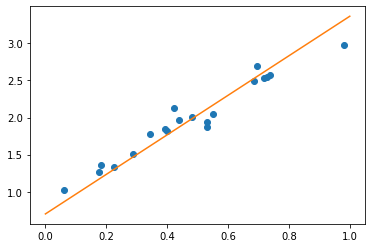

In [41]:
fit_deming_model_and_output_info(5)

y = 2.32470488321931 * x + 0.8908810840492019
Vertical residual error: 0.013806522085953649
Perpendicular residual error: 0.002155836524559327


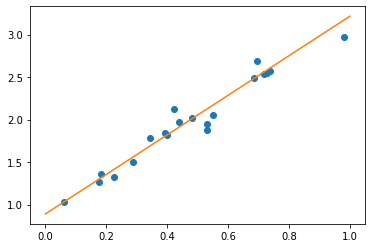

In [42]:
fit_deming_model_and_output_info(10)

y = 2.30696916546831 * x + 0.8822892120002159
Vertical residual error: 0.013326109304753597
Perpendicular residual error: 0.002107858957937118


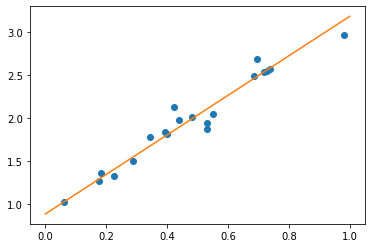

In [43]:
fit_deming_model_and_output_info(20)

#Report your observations

Comparing the residual errors (both vertical and perpendicular) for Simple least squares and Deming regression, what do you observe? 

Comment about the change magnitude of error for both regression approaches with increasing amount of data and the performance difference of the two regression approaches (Simple vs. Deming) for the same amount of data.
(To enter your response, double click "Your Answer" to activate the text block below.)

# Comparison of residual errors of Simple Least Squares(SLS) vs Deming Regression

A table of all collected values is displayed here.



|        | Simple Least Squares (vertical error) | Simple Least Squares (perpendicular error) | Deming Regression (vertical error) | Deming Regression (perpendicular error) |
| ------ | ------------------------------------- | ------------------------------------------ | ---------------------------------- | --------------------------------------- |
| n = 5  | 0.0207                                | 0.0026                                     | 0.0235                             | 0.0029                                  |
| n = 10 | 0.0135                                | 0.0023                                     | 0.0138                             | 0.00215                                  |
| n = 20 | 0.0128                                | 0.00218                                     | 0.0133                             | 0.00210                                  |

## Observations

As expected, Deming regression had a lower perpendicular error than SLS' perpendicular error, and simple least squares had a lower vertical error than Deming's. This is reflected in the loss functions and the assumptions that each model makes. Deming uses a perpendicular error function whilst SLS uses a vertical one, and thus the error reflects these choices.

Additionally, it's interesting to see that that error regardless of type generally decreased as n increased. I think this makes sense, because as the number of points increase more of the data is available to train on and accuracy will naturally improve. I think that we would see something similar in real world datasets.

The magnitude of change generally decreased as n increased. I think this is because the biggest gains in performance are going to be seen in the first few points. I also believe that the SLS model performs better than Deming given our data. Since our data was created synthetically, there should be no error in the x observation. As such, SLS was able to generate a lower vertical error than Deming and nearly the same perpendicular error given all 20 points.

---
# Save out the notebook
If you saved this notebook into the folder `ECE180` in google drive with original name, then run the following command (otherwise, adjust the path to the notebook and its name according to how you saved it). The saved out PDF will show up in the same directory as your copy of this notebook. Rename the pdf as mentioned in submission instructions and submit it to gradescope.

In [48]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/ECE 180/PA1.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/ECE 180/PA1.ipynb to PDF
[NbConvertApp] Support files will be in PA1_files/
[NbConvertApp] Making directory ./PA1_files
[NbConvertApp] Making directory ./PA1_files
[NbConvertApp] Making directory ./PA1_files
[NbConvertApp] Making directory ./PA1_files
[NbConvertApp] Making directory ./PA1_files
[NbConvertApp] Making directory ./PA1_files
[NbConvertApp] Making directory ./PA1_files
[NbConvertApp] Writing 56012 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 117446 bytes to /content/drive/MyDrive/ECE 180/PA1.pdf
